## Synthetic data

Saved → data.csv


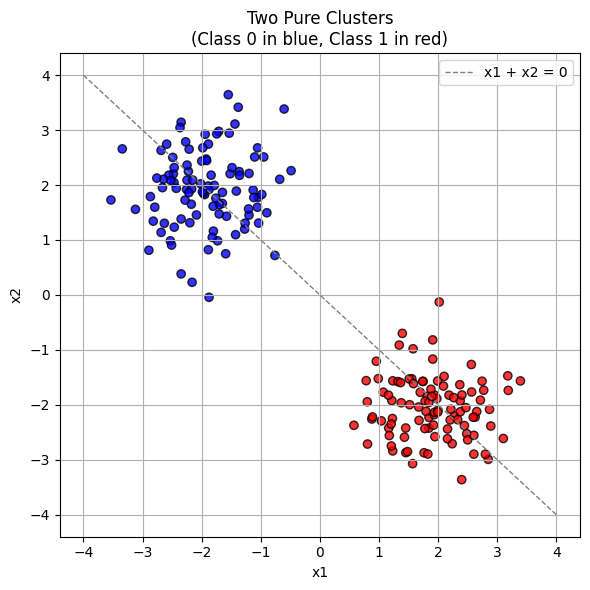

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(123)
n_per_cluster = 100

X0 = np.random.multivariate_normal(
    mean=[-2.0,  2.0],
    cov=[[0.4, 0.0],
         [0.0, 0.4]],
    size=n_per_cluster
)
y0 = np.zeros(n_per_cluster, dtype=int)

X1 = np.random.multivariate_normal(
    mean=[ 2.0, -2.0],
    cov=[[0.4, 0.0],
         [0.0, 0.4]],
    size=n_per_cluster
)
y1 = np.ones(n_per_cluster, dtype=int)

X  = np.vstack((X0, X1))
y  = np.hstack((y0, y1))
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], y=y))
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.to_csv('./data/train.csv', index=False)
print("Saved → data.csv")

colors = ['blue' if label==0 else 'red' for label in df['y']]
plt.figure(figsize=(6,6))
plt.scatter(df['x1'], df['x2'], c=colors, edgecolor='k', alpha=0.8)

lims = np.array([-4, 4])
plt.plot(lims, -lims, 'gray', ls='--', lw=1, label='x1 + x2 = 0')
plt.xlabel('x1'); plt.ylabel('x2')
plt.title('Two Pure Clusters\n(Class 0 in blue, Class 1 in red)')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()
